In [2]:
import numpy as np
import random
import os
import time

In [3]:
def data_reader(data_path):
    with open(data_path) as f:
        d_lines = f.read().splitlines()
        N=int(d_lines[0])
        subject_student_num=[int(x) for x in d_lines[1].split()]
        M=int(d_lines[2])
        room_capacity=[int(x) for x in d_lines[3].split()]
        k=int(d_lines[4])
        constraints=[]
        for i in range(k):
            constraints.append([int(x) for x in d_lines[5+i].split()])
    return N, subject_student_num, M, room_capacity, constraints

In [4]:
def constraint_matrix(n, subject_student_num, m, room_capacity):
    lst_subject=range(n)
    lst_room=range(m)
    ct_matrix=[]
    for i in range(n):
        row=[]
        for j in range(m):
            if subject_student_num[i]<=room_capacity[j]:
                row.append(1)
            else:
                row.append(0)
        ct_matrix.append(row)
    return np.array(ct_matrix)

In [5]:
def random_initialize(matrix,constraints,seed_value):
    random.seed(seed_value)
    (n,m)=matrix.shape
    satisfied_list=[]
    ordered_subjects=[]
    
    for i in range(n):
        for j in range(m):
            if matrix[i][j]==1:
                satisfied_list.append([i,j])
    
    schedule=[]

    while len(ordered_subjects)<n:
        period=[]
        take_list=satisfied_list[:]
        ordered_rooms=[]
        while len(take_list)>0:
            random_ele=random.choice(take_list)
            period.append(random_ele)
            ordered_subjects.append(random_ele[0])
            ordered_rooms.append(random_ele[1])
            satisfied_remove_lst=[]
            for ele in satisfied_list:
                if ele[0] in ordered_subjects:
                    satisfied_remove_lst.append(ele)
            satisfied_list=[x for x in satisfied_list if x not in satisfied_remove_lst]
            remove_lst=[]
            for ele in take_list:
                for y in ordered_subjects:
                    if [ele[0],y] in constraints or [y,ele[0]] in constraints or ele[0] in ordered_subjects or ele[1] in ordered_rooms:
                        remove_lst.append(ele)
            take_list=[x for x in take_list if x not in remove_lst]
        schedule.append(period)
    return schedule

In [59]:
data_path="/Users/Admin/Optimization project/data/medium_size_few_constraints/input_1.txt"
N, subject_student_num, M, room_capacity, constraints = data_reader(data_path)
matrix = constraint_matrix(N, subject_student_num, M, room_capacity)
random_initialize(matrix, constraints, 12)

[[[42, 9],
  [14, 7],
  [46, 2],
  [45, 4],
  [41, 3],
  [26, 6],
  [8, 8],
  [30, 5],
  [7, 1],
  [13, 0]],
 [[29, 8],
  [17, 1],
  [38, 7],
  [34, 4],
  [49, 5],
  [19, 2],
  [25, 3],
  [1, 9],
  [11, 0]],
 [[40, 1], [21, 9], [15, 8], [20, 7], [9, 4], [39, 3]],
 [[33, 3], [5, 4], [2, 7], [24, 9]],
 [[44, 3], [4, 9], [23, 4]],
 [[3, 8]],
 [[0, 9]],
 [[6, 7]],
 [[48, 0]],
 [[28, 9]],
 [[12, 5]],
 [[35, 7]],
 [[37, 1]],
 [[16, 7]],
 [[43, 9]],
 [[22, 4]],
 [[47, 3]],
 [[32, 5]],
 [[36, 9]],
 [[18, 4]],
 [[10, 9]],
 [[31, 9]],
 [[27, 4]]]

In [6]:
def generate_neighbour(current_schedule,room_num,lst_rooms,room_capacity,subject_lst,constraints):
    x=random.choice([1,2])
    schedule=current_schedule[:]
    if x==1:
        period=random.choice(schedule)
        current_rooms=[x[1] for x in period]
        if len(current_rooms)<room_num:
            order_room=[]
            for course in period:
                remain_rooms=[x for x in lst_rooms if x not in order_room]
                for room in remain_rooms:
                    if room_capacity[room]>=subject_lst[course[0]]:
                        course[1]=room
                        order_room.append(room)
                        break
                continue
            return schedule
        else:
            return current_schedule
    if x==2:
        if len(schedule)>=2:
            period1,period2=random.sample(schedule,2)
            lst_room1=[x[1] for x in period1]
            lst_room2=[x[1] for x in period2]
            diff_lst=[x for x in lst_room1 if x in lst_room2]
            flag=0
            for course1 in period1:
                for course2 in period2:
                    if [course1[0],course2[0]] in constraints or [course2[0],course1[0]] in constraints:
                        flag=1
                        break
            if len(period1)<room_num and len(period2)<room_num:
                if flag==0:
                    if len(diff_lst)==0:
                        schedule_minus_two_period=[x for x in schedule if x!=period1 and x!=period2]
                        for course in period2:
                            period1.append(course)
                        schedule_minus_two_period.append(period1)
                        final_schedule=schedule_minus_two_period
                        return final_schedule
                    else:
                        return current_schedule
                if flag==1:
                    return current_schedule
            else:
                return current_schedule
        else:
            return current_schedule

In [7]:
def function(schedule):
    assert type(schedule)==list
    return len(schedule)

In [8]:
def hill_climbing(n, subject_student_num, m, room_capacity, constraints, seed_value, max_iters):
    initial_schedule=random_initialize(constraint_matrix(n, subject_student_num, m, room_capacity),constraints,seed_value)
    current_schedule=initial_schedule
    period_min=function(initial_schedule)
    for i in range(max_iters):
        if len(current_schedule)>2:
            new_schedule=generate_neighbour(current_schedule,m,range(m),room_capacity,subject_student_num,constraints)
            if function(new_schedule)<period_min:
                period_min=function(new_schedule)
            current_schedule=new_schedule
    return current_schedule
        

In [64]:
hill_climbing(N, subject_student_num, M, room_capacity, constraints, 12, 10000)

[[[42, 9],
  [14, 7],
  [46, 2],
  [45, 4],
  [41, 3],
  [26, 6],
  [8, 8],
  [30, 5],
  [7, 1],
  [13, 0]],
 [[29, 1],
  [17, 2],
  [38, 3],
  [34, 4],
  [49, 5],
  [19, 0],
  [25, 7],
  [1, 9],
  [11, 6]],
 [[40, 0], [21, 9], [15, 1], [20, 4], [9, 4], [39, 3]],
 [[44, 1], [4, 4], [23, 9]],
 [[36, 4]],
 [[31, 9], [18, 4]],
 [[27, 4], [43, 1]],
 [[32, 1], [35, 4], [22, 7], [10, 9]],
 [[48, 0], [47, 1], [0, 4]],
 [[28, 4], [16, 1], [6, 0], [12, 2]],
 [[3, 0], [33, 3], [5, 4], [2, 7], [24, 9], [37, 1]]]

In [77]:
def collect_data(data_path="/Users/Admin/Optimization project/data/"):
    dirs=[data_path + dirname + "/"
          for dirname in os.listdir(data_path) if not os.path.isfile(data_path+dirname)]
    input_file=["input_"+str(i)+".txt" for i in range(1,101)]
    def collect_data_from(parent_path,input_lst):
        data=[]
        files=[(filename,parent_path+filename) for filename in input_lst if os.path.isfile(parent_path + filename)]
        for filename,filepath in files:
            with open(filepath) as f:
                N, subject_student_num, M, room_capacity, constraints = data_reader(filepath)
                start=time.time()
                score=len(hill_climbing(N, subject_student_num, M, room_capacity, constraints, 12, 10000))
                end=time.time()
                content=str(filename)+"<fff>"+"Score:"+str(score)+"<fff>"+"Time:"+str(end-start)
                data.append(content)
        return data
    
    with open("/Users/Admin/Optimization project/data/large_size_few_constraints_result.txt",'w') as f:
        data1=collect_data_from(dirs[0],input_file)
        f.write('\n'.join(data1))
    with open("/Users/Admin/Optimization project/data/large_size_many_constraints_result.txt",'w') as f:
        data2=collect_data_from(dirs[1],input_file)
        f.write('\n'.join(data2))
    with open("/Users/Admin/Optimization project/data/medium_size_few_constraints_result.txt",'w') as f:
        data3=collect_data_from(dirs[2],input_file)
        f.write('\n'.join(data3))
    with open("/Users/Admin/Optimization project/data/medium_size_many_constraints_result.txt",'w') as f:
        data4=collect_data_from(dirs[3],input_file)
        f.write('\n'.join(data4))
    with open("/Users/Admin/Optimization project/data/small_size_few_constraints_result.txt",'w') as f:
        data5=collect_data_from(dirs[4],input_file)
        f.write('\n'.join(data5))
    with open("/Users/Admin/Optimization project/data/small_size_many_constraints_result.txt",'w') as f:
        data6=collect_data_from(dirs[5],input_file)
        f.write('\n'.join(data6))
    

In [78]:
collect_data()

In [1]:
def read_avg(data_path):
    with open(data_path) as f:
        lines=f.read().splitlines()
        total_score=total_time=0
        for line in lines:
            features=line.split('<fff>')
            score=int(features[1].split(':')[1])
            time=float(features[2].split(':')[1])
            total_score+=score
            total_time+=time
    return total_score/100, total_time/100
print(read_avg("/Users/Admin/Optimization project/data/large_size_few_constraints_result.txt"))
print(read_avg("/Users/Admin/Optimization project/data/large_size_many_constraints_result.txt"))
print(read_avg("/Users/Admin/Optimization project/data/medium_size_few_constraints_result.txt"))
print(read_avg("/Users/Admin/Optimization project/data/medium_size_many_constraints_result.txt"))
print(read_avg("/Users/Admin/Optimization project/data/small_size_few_constraints_result.txt"))
print(read_avg("/Users/Admin/Optimization project/data/small_size_many_constraints_result.txt"))

(22.12, 4.117746713161469)
(36.32, 48.50418900966644)
(15.89, 0.29266653060913084)
(24.58, 1.859177348613739)
(7.33, 0.03188578605651855)
(8.92, 0.03417684316635132)


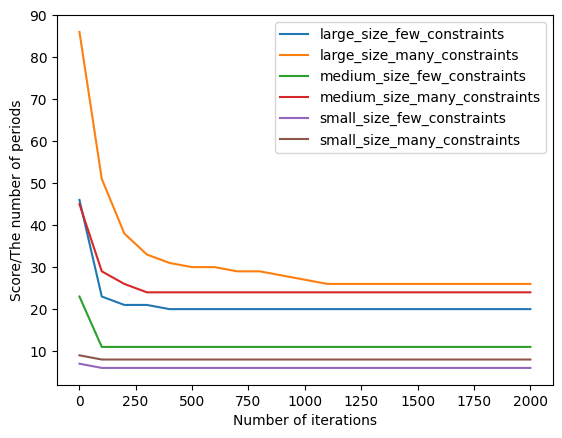

In [10]:
import matplotlib.pyplot as plt

def hill_climbing_report(n, subject_student_num, m, room_capacity, constraints, seed_value, max_iters):
    initial_schedule=random_initialize(constraint_matrix(n, subject_student_num, m, room_capacity),constraints,seed_value)
    current_schedule=initial_schedule
    period_min=function(initial_schedule)
    score=[period_min]
    iter_lst=[1]
    for i in range(1,max_iters+1):
        if len(current_schedule)>=2:
            new_schedule=generate_neighbour(current_schedule,m,range(m),room_capacity,subject_student_num,constraints)
            if function(new_schedule)<period_min:
                period_min=function(new_schedule)
            current_schedule=new_schedule
        if i%100==0:
            score.append(period_min)
            iter_lst.append(i)
    return iter_lst, score

N1, subject_student_num1, M1, room_capacity1, constraints1 = data_reader("/Users/Admin/Optimization project/data/large_size_few_constraints/input_1.txt")
x1, y1 = hill_climbing_report(N1, subject_student_num1, M1, room_capacity1, constraints1, 12, 2000)
N2, subject_student_num2, M2, room_capacity2, constraints2 = data_reader("/Users/Admin/Optimization project/data/large_size_many_constraints/input_1.txt")
x2, y2 = hill_climbing_report(N2, subject_student_num2, M2, room_capacity2, constraints2, 12, 2000)
N3, subject_student_num3, M3, room_capacity3, constraints3 = data_reader("/Users/Admin/Optimization project/data/medium_size_few_constraints/input_1.txt")
x3, y3 = hill_climbing_report(N3, subject_student_num3, M3, room_capacity3, constraints3, 12, 2000)
N4, subject_student_num4, M4, room_capacity4, constraints4 = data_reader("/Users/Admin/Optimization project/data/medium_size_many_constraints/input_1.txt")
x4, y4 = hill_climbing_report(N4, subject_student_num4, M4, room_capacity4, constraints4, 12, 2000)
N5, subject_student_num5, M5, room_capacity5, constraints5 = data_reader("/Users/Admin/Optimization project/data/small_size_few_constraints/input_1.txt")
x5, y5 = hill_climbing_report(N5, subject_student_num5, M5, room_capacity5, constraints5, 12, 2000)
N6, subject_student_num6, M6, room_capacity6, constraints6 = data_reader("/Users/Admin/Optimization project/data/small_size_many_constraints/input_1.txt")
x6, y6 = hill_climbing_report(N6, subject_student_num6, M6, room_capacity6, constraints6, 12, 2000)

plt.plot(x1, y1, label="large_size_few_constraints")
plt.plot(x2, y2, label="large_size_many_constraints")
plt.plot(x3, y3, label="medium_size_few_constraints")
plt.plot(x4, y4, label="medium_size_many_constraints")
plt.plot(x5, y5, label="small_size_few_constraints")
plt.plot(x6, y6, label="small_size_many_constraints")
plt.legend()
plt.xlabel("Number of iterations")
plt.ylabel("Score/The number of periods")
plt.show()